In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add parent directory to path

In [2]:
image_folder = '../data/processed/image_174_label_1/'
ms_file = os.listdir(image_folder + 'ms')[0]
ms_path = os.path.join(image_folder, 'ms', ms_file)

In [3]:
from src.preprocess.imager import Imager

imager = Imager(vis = ms_path, output_path=image_folder)

tclean_config = {
    'imsize': 256,
    'cell': '0.04arcsec',
    'niter': 50000,
    'weighting': 'natural',
}

imager.tclean(config=tclean_config)

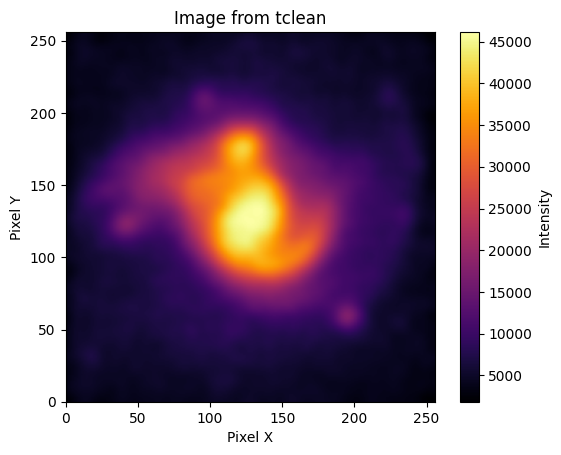

In [4]:
from src.utils.plot import plot_image
plot_image(image_path=os.path.join(image_folder, 'tclean', 'tclean.image'), title='Image from tclean')

In [5]:
# gpuvmem_config = {
#     'gpuvmem': 1000,
# }
# imager.gpuvmem(config=gpuvmem_config)

SNR: 12.607954762382636
SSIM: 0.5167755298317976
PSNR: 23.23014240048721


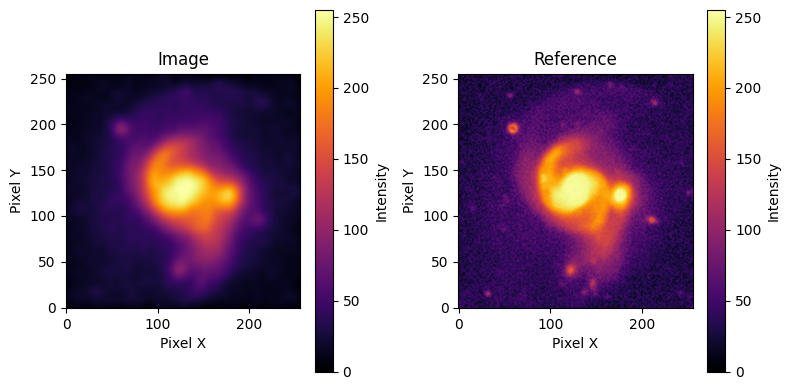

In [6]:
from src.preprocess.image_quality_metrics import ImageQualityMetrics

image_path = os.path.join(image_folder, 'tclean', 'tclean.image')
reference_folder = os.path.join(image_folder, 'groundtruth')
reference_image = os.listdir(reference_folder)[0]
reference_path = os.path.join(reference_folder, reference_image)

iqm = ImageQualityMetrics(image_path=image_path, reference_path=reference_path)
snr = iqm.calculate_snr()
ssim = iqm.calculate_ssim()
psnr = iqm.calculate_psnr()

iqm.plot_images()

print(f'SNR: {snr}')
print(f'SSIM: {ssim}')
print(f'PSNR: {psnr}')